# Projet 1

In [1]:
import pyvista as pv
import dolfinx
from dolfinx import mesh, fem, plot, io, default_scalar_type
from dolfinx.fem.petsc import LinearProblem
from mpi4py import MPI
import ufl
import numpy as np
import gmsh
import meshio
from dolfinx.io import XDMFFile

import dolfinx.fem as fem
import dolfinx.mesh as mesh
from petsc4py import PETSc

# Initialisation de GMSH
gmsh.initialize()
gmsh.model.add("cylindre")

lc = 0.1    # Longueur caractéristique des éléments en mètres

# Créer un cylindre
#gmsh.model.occ.addCylinder(0, 0, 0, 0, 0, height, radius)

#gmsh.model.occ.addCylinder(0, 0, 0, 0, 0, height, radius)
# Exemple avec les dimensions spécifiques
a = 0  # Coordonnée x du coin inférieur gauche
b = 0  # Coordonnée y du coin inférieur gauche
L = 1 # Longueur dans la direction z
width = 0.2  # Largeur dans la direction x
height = 0.2  # Hauteur dans la direction y

gmsh.model.occ.addBox(a, b, 0, width, height, L)

# Synchronisation de la géométrie
gmsh.model.occ.synchronize()

# Définir les tailles des éléments
gmsh.option.setNumber("Mesh.CharacteristicLengthMin", lc)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", lc)

# Générer le maillage
gmsh.model.mesh.generate(3)  # 3 pour le maillage en 3D

# Sauvegarder le maillage dans un fichier .msh
gmsh.write("cylindre.msh")

# Finaliser GMSH
gmsh.finalize()

# Lire le fichier .msh avec meshio
msh = meshio.read("cylindre.msh")

# Sauvegarder le maillage en format XDMF
meshio.write("cylindre.xdmf", meshio.Mesh(points=msh.points, cells={"tetra": msh.cells_dict.get("tetra", [])}))

# Lire le fichier .xdmf avec Dolfinx
with XDMFFile(MPI.COMM_WORLD, "cylindre.xdmf", "r") as xdmf_file:
    domain = xdmf_file.read_mesh(name="Grid")
    domain.topology.create_connectivity(domain.topology.dim-1, domain.topology.dim)

# Afficher des informations sur le maillage
print("Maillage créé avec succès.")
print(f"Nombre de sommets : {domain.topology.index_map(domain.topology.dim).size_global}")
print(f"Nombre d'éléments : {domain.topology.index_map(domain.topology.dim-1).size_global}")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00146012s, CPU 0.000692s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 60%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%] Meshing surface 6 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00411946s

In [24]:
!pip install panel pyvista pyvista-panel

ERROR: Could not find a version that satisfies the requirement pyvista-panel (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for pyvista-panel


In [31]:
!pip install pyvista panel ipyvtklink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.11
    Uninstalling widgetsnbextension-4.0.11:
      Successfully uninstalled widgetsnbextension-4.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.3
    Uninstalling ipywidgets-8.1.3:
      Successfully uninstalled ipywidgets-8.1.3

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


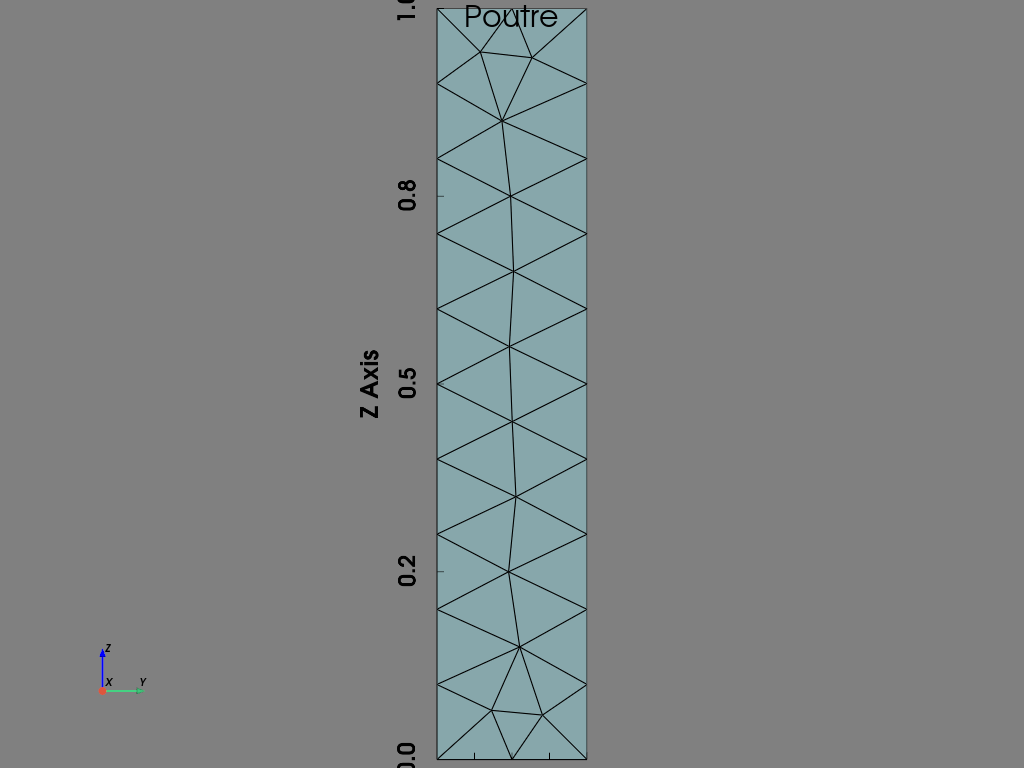

In [36]:
import pyvista as pv
import panel as pn

# Charger l'extension Panel pour l'interactivité
pn.extension()

# Préparer les données (remplace par tes données)
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(domain)
u_grid = pv.UnstructuredGrid(u_topology, u_cell_types, u_geometry)

# Configurer le Plotter PyVista
p = pv.Plotter(notebook=True)

# Ajouter le maillage et les détails
p.add_mesh(u_grid, show_edges=True, scalar_bar_args={
    "title": "u",
    "title_font_size": 24,
    "label_font_size": 22,
    "shadow": True,
    "italic": True,
    "font_family": "arial",
    "vertical": False
})
p.add_text("Poutre", font_size=12, color="black", position="upper_edge")
p.show_bounds(color="black")
p.add_axes(color="black")
p.set_background("grey")
p.view_yz()

# Afficher avec jupyter_backend='panel'
p.show(jupyter_backend='auto')


In [2]:
# Création du maillage pour PyVista basé sur les coordonnées des dofs
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(domain)

# Créez la grille PyVista et ajoutez les valeurs des dofs à la grille
u_grid = pv.UnstructuredGrid(u_topology, u_cell_types, u_geometry)

# Visualisation
p = pv.Plotter()

#u_grid.point_data["u"] = uh.x.array.reshape((u_geometry.shape[0], 2))
#warped = u_grid.warp_by_scalar("u", factor=10)
p.add_mesh(u_grid, show_edges=True, scalar_bar_args={
    "title": "u",
    "title_font_size": 24,
    "label_font_size": 22,
    "shadow": True,
    "italic": True,
    "font_family": "arial",
    "vertical": False
})
p.add_text("Poutre", font_size=12, color="black", position="upper_edge")
p.show_bounds(color="black")
p.add_axes(color="black")
p.set_background("grey")
p.show()
p.view_yz()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x164a9a180_0&reconnect=auto" class="pyvista…

In [3]:
V = fem.functionspace(domain, ("Lagrange", 1, (domain.geometry.dim, )))

def clamped_boundary(x):
    return np.isclose(x[2], 0)

def constraint_boundary(x):
    return np.isclose(x[2], L)

def on_x_min_face(x):
    return np.isclose(x[0], a)

def on_x_max_face(x):
    return np.isclose(x[0], width)

def on_y_min_face(x):
    return np.isclose(x[1], b)

def on_y_max_face(x):
    return np.isclose(x[1], height)

#def create_marker_function(marker_function):
#    return lambda x: marker_function(x)

# Créer les fonctions marqueurs pour chaque face
#on_x_min_face_marker = create_marker_function(on_x_min_face)
#on_x_max_face_marker = create_marker_function(on_x_max_face)
#on_y_min_face_marker = create_marker_function(on_y_min_face)
#on_y_max_face_marker = create_marker_function(on_y_max_face)

fdim = domain.topology.dim - 1

# Localiser les entités des frontières
boundary_down = mesh.locate_entities(domain, fdim, clamped_boundary)
boundary_top = mesh.locate_entities(domain, fdim, constraint_boundary)
boundary_x_min = mesh.locate_entities(domain, fdim, on_x_min_face)
boundary_x_max = mesh.locate_entities(domain, fdim, on_x_max_face)
boundary_y_min = mesh.locate_entities(domain, fdim, on_y_min_face)
boundary_y_max = mesh.locate_entities(domain, fdim, on_y_max_face)

u_D = np.array([0, 0, 0], dtype=default_scalar_type)
#u_D = np.array((0,) * domain.geometry.dim, dtype=default_scalar_type)

bc1 = fem.dirichletbc(u_D, fem.locate_dofs_topological(V, fdim, boundary_down), V)
bc2 = fem.dirichletbc(u_D, fem.locate_dofs_topological(V, fdim, boundary_top), V)
bc3 = fem.dirichletbc(u_D, fem.locate_dofs_topological(V, fdim, boundary_x_min), V)
bc4 = fem.dirichletbc(u_D, fem.locate_dofs_topological(V, fdim, boundary_x_max), V)
bc5 = fem.dirichletbc(u_D, fem.locate_dofs_topological(V, fdim, boundary_y_min), V)
bc6 = fem.dirichletbc(u_D, fem.locate_dofs_topological(V, fdim, boundary_y_max), V) 

In [4]:
import numpy as np

# Définir une fonction pour appliquer des marqueurs
def apply_marker(boundary_facets, marker_array, marker_value):
    boundary_facets = boundary_facets[boundary_facets < num_cells_local]
    marker_array[boundary_facets] = marker_value

# Obtenir le nombre de cellules locales
num_cells_local = domain.topology.index_map(fdim).size_local

# Initialiser les tableaux de marqueurs
markers = [np.zeros(num_cells_local, dtype=np.int32) for _ in range(6)]

# Appliquer les marqueurs
apply_marker(boundary_down, markers[0], 1)    # Marqueur 1
apply_marker(boundary_top, markers[1], 2)     # Marqueur 2
apply_marker(boundary_x_min, markers[2], 3)   # Marqueur 3
apply_marker(boundary_x_max, markers[3], 4)   # Marqueur 4
apply_marker(boundary_y_min, markers[4], 5)   # Marqueur 5
apply_marker(boundary_y_max, markers[5], 6)   # Marqueur 6


# Créer la connectivité du domaine
domain.topology.create_connectivity(fdim, fdim)

# Obtenir les données de maillage pour PyVista
topology, cell_types, x = dolfinx.plot.vtk_mesh(domain, fdim, np.arange(num_cells_local, dtype=np.int32))

In [5]:
import pyvista as pv
import numpy as np

# Création du maillage PyVista
grid = pv.UnstructuredGrid(topology, cell_types, x)

# Fonction pour ajouter des maillages à une fenêtre
def add_plot(ax, marker, color, title, threshold_min):
    # Mettre à jour les données de cellule du maillage
    grid.cell_data["Marker"] = marker
    grid.set_active_scalars("Marker")
    
    # Ajouter le maillage avec les marqueurs
    ax.add_mesh(grid, show_edges=True, color="cyan", scalar_bar_args={
        "title": "Boundary Marker",
        "title_font_size": 24,
        "label_font_size": 22,
        "shadow": True,
        "italic": True,
        "font_family": "arial",
        "vertical": False
    })
    
    # Appliquer un filtre basé sur le seuil
    grid_filter = grid.threshold(threshold_min, scalars='Marker')
    ax.add_mesh(grid_filter, color=color, show_edges=True)
    
    # Ajouter le texte et les axes
    ax.add_text(title, font_size=12, color="black", position="upper_edge")
    ax.add_axes(color="black")

# Visualisation avec PyVista
pl = pv.Plotter(shape=(2, 3))

# Fenêtre 1 : Afficher les cellules avec marker1
pl.subplot(0, 0)
add_plot(pl, markers[0], "red", "Down Boundary", threshold_min=0.5)

# Fenêtre 2 : Afficher les cellules avec marker2
pl.subplot(0, 1)
add_plot(pl, markers[1], "red", "Top Boundary", threshold_min=1.5)

# Fenêtre 3 : Afficher les cellules avec marker3
pl.subplot(0, 2)
add_plot(pl, markers[2], "red", "Lateral x min", threshold_min=2.5)

# Fenêtre 4 : Afficher les cellules avec marker4
pl.subplot(1, 0)
add_plot(pl, markers[3], "red", "Lateral x max", threshold_min=3.5)

# Fenêtre 5 : Afficher les cellules avec marker5
pl.subplot(1, 1)
add_plot(pl, markers[4], "red", "Lateral y min", threshold_min=4.5)

# Fenêtre 6 : Afficher les cellules avec marker6
pl.subplot(1, 2)
add_plot(pl, markers[5], "red", "Lateral y max", threshold_min=5.5)

# Configuration finale
pl.set_background("grey")
pl.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x16a04f500_1&reconnect=auto" class="pyvista…

In [6]:
T = fem.Constant(domain, default_scalar_type((0, 0.1, 0)))

# Marqueurs des facettes
marked_facets = np.hstack([boundary_top])
#marked_values = np.hstack([np.full_like(boundary_down, 1), np.full_like(boundary_top, 2)])
marked_values = np.hstack([np.full_like(boundary_top, 1)])
# Tri des facettes et valeurs
sorted_facets = np.argsort(marked_facets)
facet_tag = dolfinx.mesh.meshtags(domain, domain.topology.dim - 1, marked_facets[sorted_facets], marked_values[sorted_facets])

# Définir une mesure pour les facettes marquées
ds = ufl.Measure('ds', domain=domain, subdomain_data=facet_tag)

def epsilon(u):
    return ufl.sym(ufl.grad(u))  # Equivalent to 0.5*(ufl.nabla_grad(u) + ufl.nabla_grad(u).T) ou 0.5 * (ufl.grad(u).T + ufl.grad(u))
mu = 1
lambda_ = 1.25

def sigma(u):
    return lambda_ * ufl.nabla_div(u) * ufl.Identity(len(u)) + 2 * mu * epsilon(u)

u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

# Extraire les composantes du gradient et les assembler en un vecteur
grad_u = ufl.grad(u)
grad_u_vec = ufl.as_vector([grad_u[0, 0], grad_u[1, 1], grad_u[2, 2]]) 
product_vectoriel = ufl.cross(v, grad_u_vec)

f = fem.Constant(domain, default_scalar_type((0, 0, 0)))
a = ufl.inner(sigma(u), epsilon(v)) * ufl.dx
L = ufl.dot(f, v) * ufl.dx + ufl.dot(T, v) * ds(1)  # Terme de force volumique, pression et moment de torsion
problem = LinearProblem(a, L, bcs=[bc1], petsc_options={"ksp_type": "cg", "pc_type": "jacobi"})
#problem = LinearProblem(a, L, bcs=[bc1], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
uh = problem.solve()

In [7]:
# Création du maillage pour PyVista basé sur les coordonnées des dofs
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(domain)

# Créez la grille PyVista et ajoutez les valeurs des dofs à la grille
u_grid = pv.UnstructuredGrid(u_topology, u_cell_types, u_geometry)

# Convertir le vecteur de solution en format compatible pour PyVista
uh_vectors = uh.x.array.reshape((-1, domain.geometry.dim))

# Attach vector values to grid and warp grid by vector
u_grid["u"] = uh.x.array.reshape((u_geometry.shape[0], 3))

# Visualisation
p = pv.Plotter()
p.add_mesh(u_grid, show_edges=True, scalar_bar_args={
    "title": "u",
    "title_font_size": 24,
    "label_font_size": 22,
    "shadow": True,
    "italic": True,
    "font_family": "arial",
    "vertical": False
})
p.add_text("Déplacements", font_size=12, color="black", position="upper_edge")
p.add_axes(color="black")
p.set_background("grey")
p.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x16a8c7800_2&reconnect=auto" class="pyvista…

In [8]:
dargs = dict(
    scalars="u",
    cmap="jet",
    show_scalar_bar=False,
)

pl = pv.Plotter(shape=(2, 2))
pl.subplot(0, 0)
pl.add_mesh(u_grid, **dargs)
pl.add_axes(color="black")
pl.add_text("Normalized Displacement", color='k')
pl.subplot(0, 1)
pl.add_mesh(u_grid.copy(), component=0, **dargs)
pl.add_axes(color="black")
pl.add_text("X Displacement", color='k')
pl.subplot(1, 0)
pl.add_mesh(u_grid.copy(), component=1, **dargs)
pl.add_axes(color="black")
pl.add_text("Y Displacement", color='k')
pl.subplot(1, 1)
pl.add_mesh(u_grid.copy(), component=2, **dargs)
pl.add_axes(color="black")
pl.add_text("Z Displacement", color='k')

# Lier les vues pour une vue cohérente
pl.link_views()
pl.camera_position = 'iso'
pl.background_color = 'grey'
# Afficher le tout
pl.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x16a8e6150_3&reconnect=auto" class="pyvista…

In [9]:
###### Visualisation
p = pv.Plotter()
warped = u_grid.warp_by_vector("u", factor=0.1)

p.add_mesh(warped, show_edges=False, scalar_bar_args={
    "title": "u",
    "title_font_size": 24,
    "label_font_size": 22,
    "shadow": True,
    "italic": True,
    "font_family": "arial",
    "vertical": False
})
p.add_text("Déplacements", font_size=12, color="black", position="upper_edge")
p.show_bounds(color="black")
p.add_axes(color="black")
p.set_background("grey")
p.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x17f6727e0_4&reconnect=auto" class="pyvista…

In [10]:
import pyvista as pv
import numpy as np
import dolfinx
import ufl
from petsc4py import PETSc
from mpi4py import MPI
import matplotlib.pyplot as plt

# Calculer le tenseur de déformation
eps = epsilon(uh)

# Extraire les composantes du tenseur de déformation
eps_xx = eps[0, 0]
eps_xy = eps[0, 1]
eps_xz = eps[0, 2]
eps_yy = eps[1, 1]
eps_yz = eps[1, 2]
eps_zz = eps[2, 2]

# Créez la grille PyVista
eps_topology, eps_cell_types, eps_geometry = dolfinx.plot.vtk_mesh(domain)
eps_grid = pv.UnstructuredGrid(eps_topology, eps_cell_types, eps_geometry)

V_eps = fem.functionspace(domain, ("DG", 0))

eps_xx_expr = fem.Expression(eps_xx, V_eps.element.interpolation_points())
strain_xx = fem.Function(V_eps)
strain_xx.interpolate(eps_xx_expr)

eps_yy_expr = fem.Expression(eps_yy, V_eps.element.interpolation_points())
strain_yy = fem.Function(V_eps)
strain_yy.interpolate(eps_yy_expr)

eps_zz_expr = fem.Expression(eps_zz, V_eps.element.interpolation_points())
strain_zz = fem.Function(V_eps)
strain_zz.interpolate(eps_zz_expr)

eps_yz_expr = fem.Expression(eps_yz, V_eps.element.interpolation_points())
strain_yz = fem.Function(V_eps)
strain_yz.interpolate(eps_yz_expr)

eps_xz_expr = fem.Expression(eps_xz, V_eps.element.interpolation_points())
strain_xz = fem.Function(V_eps)
strain_xz.interpolate(eps_xz_expr)

eps_xy_expr = fem.Expression(eps_xy, V_eps.element.interpolation_points())
strain_xy = fem.Function(V_eps)
strain_xy.interpolate(eps_xy_expr)

pl = pv.Plotter(shape=(2, 3))

warped = u_grid.warp_by_vector("u", factor=0)

dargs = dict(
    cmap="jet",
    show_scalar_bar=False,
)

pl.subplot(0, 0)
warped.cell_data["Epsilon_XX"] = strain_xx.vector.array
warped.set_active_scalars("Epsilon_XX")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Epsilon XX", color='k')

pl.subplot(0, 1)
warped.cell_data["Epsilon_YY"] = strain_yy.vector.array
warped.set_active_scalars("Epsilon_YY")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Epsilon YY", color='k')

pl.subplot(0, 2)
warped.cell_data["Epsilon_ZZ"] = strain_zz.vector.array
warped.set_active_scalars("Epsilon_ZZ")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Epsilon ZZ", color='k')

pl.subplot(1, 0)
warped.cell_data["Epsilon_YZ"] = strain_yz.vector.array
warped.set_active_scalars("Epsilon_YZ")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Epsilon YZ", color='k')

pl.subplot(1, 1)
warped.cell_data["Epsilon_XZ"] = strain_xz.vector.array
warped.set_active_scalars("Epsilon_XZ")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Epsilon XZ", color='k')

pl.subplot(1, 2)
warped.cell_data["Epsilon_XY"] = strain_xy.vector.array
warped.set_active_scalars("Epsilon_XY")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Epsilon XY", color='k')

# Lier les vues pour une vue cohérente
pl.link_views()
pl.camera_position = 'iso'
pl.background_color = 'grey'
# Afficher le tout
pl.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x29f14e570_5&reconnect=auto" class="pyvista…

In [11]:
import pyvista as pv
import numpy as np
import dolfinx
import ufl
from petsc4py import PETSc
from mpi4py import MPI
import matplotlib.pyplot as plt

# Calculer le tenseur de déformation
def omega(u):
    return 0.5 * (ufl.grad(u).T - ufl.grad(u))

# Calculer le tenseur de déformation
theta = omega(uh)

# Extraire les composantes du tenseur de déformation
theta_xx = theta[0, 0]
theta_xy = theta[0, 1]
theta_xz = theta[0, 2]
theta_yy = theta[1, 1]
theta_yz = theta[1, 2]
theta_zz = theta[2, 2]

# Créez la grille PyVista
theta_topology, theta_cell_types, theta_geometry = dolfinx.plot.vtk_mesh(domain)
eps_grid = pv.UnstructuredGrid(theta_topology, theta_cell_types, theta_geometry)

V_omega = fem.functionspace(domain, ("DG", 0))

# Calculer la norme de rotation
norm_theta = ufl.sqrt(theta_xx**2 + theta_yy**2 + theta_zz**2)

rotation_expr = fem.Expression(norm_theta, V_omega.element.interpolation_points())
rotation_norm= fem.Function(V_omega)
rotation_norm.interpolate(rotation_expr)

rotation_expr = fem.Expression(theta_yz, V_omega.element.interpolation_points())
rotation_x = fem.Function(V_omega)
rotation_x.interpolate(rotation_expr)

rotation_expr = fem.Expression(theta_xz, V_omega.element.interpolation_points())
rotation_y = fem.Function(V_omega)
rotation_y.interpolate(rotation_expr)

rotation_expr = fem.Expression(theta_xy, V_omega.element.interpolation_points())
rotation_z = fem.Function(V_omega)
rotation_z.interpolate(rotation_expr)

pl = pv.Plotter(shape=(2, 2))
dargs = dict(
    cmap="jet",
    show_scalar_bar=False,
)
pl.subplot(0, 0)
warped.cell_data["Normal"] = rotation_norm.vector.array
warped.set_active_scalars("Normal")
pl.add_mesh(warped, **dargs)
pl.add_axes(color="black")
pl.add_text("Normalized rotation", color='k')
pl.subplot(0, 1)
warped.cell_data["RX"] = rotation_x.vector.array
warped.set_active_scalars("RX")
pl.add_mesh(warped, **dargs)
pl.add_axes(color="black")
pl.add_text("rotation RX", color='k')
pl.subplot(1, 0)
warped.cell_data["RY"] = rotation_y.vector.array
warped.set_active_scalars("RY")
pl.add_mesh(warped, **dargs)
pl.add_axes(color="black")
pl.add_text("rotation RY", color='k')
pl.subplot(1, 1)
warped.cell_data["RZ"] = rotation_z.vector.array
warped.set_active_scalars("RZ")
pl.add_mesh(warped, **dargs)
pl.add_axes(color="black")
pl.add_text("rotation RZ", color='k')

# Lier les vues pour une vue cohérente
pl.link_views()
pl.camera_position = 'iso'
pl.background_color = 'grey'
# Afficher le tout
pl.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x2a5f731a0_6&reconnect=auto" class="pyvista…

In [12]:
import pyvista as pv
import numpy as np
import dolfinx
import ufl
from petsc4py import PETSc
from mpi4py import MPI
import matplotlib.pyplot as plt

# Calculer le tenseur de déformation
sig = sigma(uh)

# Extraire les composantes du tenseur de déformation
sig_xx = sig[0, 0]
sig_xy = sig[0, 1]
sig_xz = sig[0, 2]
sig_yy = sig[1, 1]
sig_yz = sig[1, 2]
sig_zz = sig[2, 2]

V_sig = fem.functionspace(domain, ("DG", 0))

sig_xx_expr = fem.Expression(sig_xx, V_sig.element.interpolation_points())
stress_xx = fem.Function(V_sig)
stress_xx.interpolate(sig_xx_expr)

sig_yy_expr = fem.Expression(sig_yy, V_sig.element.interpolation_points())
stress_yy = fem.Function(V_sig)
stress_yy.interpolate(sig_yy_expr)

sig_zz_expr = fem.Expression(sig_zz, V_sig.element.interpolation_points())
stress_zz = fem.Function(V_sig)
stress_zz.interpolate(sig_zz_expr)

sig_yz_expr = fem.Expression(sig_yz, V_sig.element.interpolation_points())
stress_yz = fem.Function(V_sig)
stress_yz.interpolate(sig_yz_expr)

sig_xz_expr = fem.Expression(sig_xz, V_sig.element.interpolation_points())
stress_xz = fem.Function(V_sig)
stress_xz.interpolate(sig_xz_expr)

sig_xy_expr = fem.Expression(sig_xy, V_sig.element.interpolation_points())
stress_xy = fem.Function(V_sig)
stress_xy.interpolate(sig_xy_expr)

pl = pv.Plotter(shape=(2, 3))

dargs = dict(
    cmap="jet",
    show_scalar_bar=False,
)

pl.subplot(0, 0)
warped.cell_data["Sigma_XX"] = stress_xx.vector.array
warped.set_active_scalars("Sigma_XX")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Sigma XX", color='k')

pl.subplot(0, 1)
warped.cell_data["Sigma_YY"] = stress_yy.vector.array
warped.set_active_scalars("Sigma_YY")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Sigma YY", color='k')

pl.subplot(0, 2)
warped.cell_data["Sigma_ZZ"] = stress_zz.vector.array
warped.set_active_scalars("Sigma_ZZ")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Sigma ZZ", color='k')

pl.subplot(1, 0)
warped.cell_data["Sigma_YZ"] = stress_yz.vector.array
warped.set_active_scalars("Sigma_YZ")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Sigma YZ", color='k')

pl.subplot(1, 1)
warped.cell_data["Sigma_XZ"] = stress_xz.vector.array
warped.set_active_scalars("Sigma_XZ")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Sigma XZ", color='k')

pl.subplot(1, 2)
warped.cell_data["Sigma_XY"] = stress_xy.vector.array
warped.set_active_scalars("Sigma_XY")
pl.add_mesh(warped, **dargs)    
pl.add_axes(color="black")
pl.add_text("Sigma XY", color='k')

# Lier les vues pour une vue cohérente
pl.link_views()
pl.camera_position = 'iso'
pl.background_color = 'grey'
# Afficher le tout
pl.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x2a9350620_7&reconnect=auto" class="pyvista…

In [13]:
s = sigma(uh) - 1. / 3 * ufl.tr(sigma(uh)) * ufl.Identity(len(uh))
von_Mises = ufl.sqrt(3. / 2 * ufl.inner(s, s))

V_von_mises = fem.functionspace(domain, ("DG", 0))
stress_expr = fem.Expression(von_Mises, V_von_mises.element.interpolation_points())
stresses = fem.Function(V_von_mises)
stresses.interpolate(stress_expr)

In [14]:
# Créez une nouvelle instance de Plotter
warped.cell_data["VonMises"] = stresses.vector.array
warped.set_active_scalars("VonMises")

p = pv.Plotter()
p.add_mesh(warped, cmap="jet", show_edges=False, scalar_bar_args={
    "title": "Von Mises",
    "title_font_size": 24,
    "label_font_size": 22,
    "shadow": True,
    "italic": True,
    "font_family": "arial",
    "vertical": False
})
p.add_text("Von Mises", font_size=12, color="black", position="upper_edge")

p.add_axes(color="black")
p.set_background("grey")
p.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x2a9351160_8&reconnect=auto" class="pyvista…

In [15]:
import pyvista as pv
import numpy as np
import dolfinx
import ufl
from petsc4py import PETSc
from mpi4py import MPI
import matplotlib.pyplot as plt

# Calculer le tenseur de déformation
def epsilon(u):
    return 0.5 * (ufl.grad(u).T + ufl.grad(u))

# Calculer le tenseur de déformation
eps = epsilon(uh)

# Créer un espace de fonctions pour les données projetées
V_eps = V

# Créer une fonction pour stocker les résultats projetés
def create_function_from_expression(eps_component, V):
    func = dolfinx.fem.Function(V)
    expr = dolfinx.fem.Expression(eps_component, V.element.interpolation_points())
    func.interpolate(expr)
    return func

# Extraire les composantes du tenseur de déformation
eps_xx = sig[0, 0]
eps_xy = sig[0, 1]
eps_xz = sig[0, 2]
eps_yy = sig[1, 1]
eps_yz = sig[1, 2]
eps_zz = sig[2, 2]

# Projeter chaque composante du tenseur de déformation dans l'espace de fonctions
components = [eps_xx, eps_xy, eps_xz, eps_yy, eps_yz, eps_zz]
component_names = ['Epsilon_XX', 'Epsilon_XY', 'Epsilon_XZ', 'Epsilon_YY', 'Epsilon_YZ', 'Epsilon_ZZ']

# Créez la grille PyVista
eps_topology, eps_cell_types, eps_geometry = dolfinx.plot.vtk_mesh(domain)
eps_grid = pv.UnstructuredGrid(eps_topology, eps_cell_types, eps_geometry)

# Ajouter chaque composante à la grille PyVista
#for i, (component, name) in enumerate(zip(components, component_names)):
#    component_func = create_function_from_expression(component, V_eps)
#    eps_grid[name] = component_func.x.array

V_von_mises = fem.functionspace(domain, ("DG", 0))
stress_expr = fem.Expression(eps_zz, V_von_mises.element.interpolation_points())
stresses = fem.Function(V_von_mises)
stresses.interpolate(stress_expr)

# Créez une nouvelle instance de Plotter
p = pv.Plotter()
warped.cell_data["VonMises"] = stresses.vector.array
warped.set_active_scalars("VonMises")
p.add_mesh(warped, show_edges=False, scalar_bar_args={
    "title": "Von Mises",
    "title_font_size": 24,
    "label_font_size": 22,
    "shadow": True,
    "italic": True,
    "font_family": "arial",
    "vertical": False
})
p.add_text("Von Mises", font_size=12, color="black", position="upper_edge")

p.add_axes(color="black")
p.set_background("grey")
p.show()

Widget(value='<iframe src="http://localhost:62543/index.html?ui=P_0x2a9427470_9&reconnect=auto" class="pyvista…